In [1]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
import skimage.io as io
from PIL import Image
import numpy as np

from SimpleHRNet import SimpleHRNet

ModuleNotFoundError: No module named 'SimpleHRNet'

In [66]:
w_path = "C:\VSCodeProjects\PatternRecognition\Lab-9\pose_hrnet_w32_256x192.pth"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleHRNet(32, 17, w_path, yolo_version='v5', yolo_model_def='yolov5n', device=device, multiperson=True)

url = "https://img.freepik.com/premium-photo/successful-two-businessman-suitthey-are-happy-jumping-isolated-background-business-concept-lifestyle-concept_252847-12202.jpg"
im = Image.open(requests.get(url=url, stream=True).raw)
image = io.imread(url)

joints = model.predict(image)



device: 'cuda' - 1 GPU(s) will be used


Using cache found in C:\Users\kufuk/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-19 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


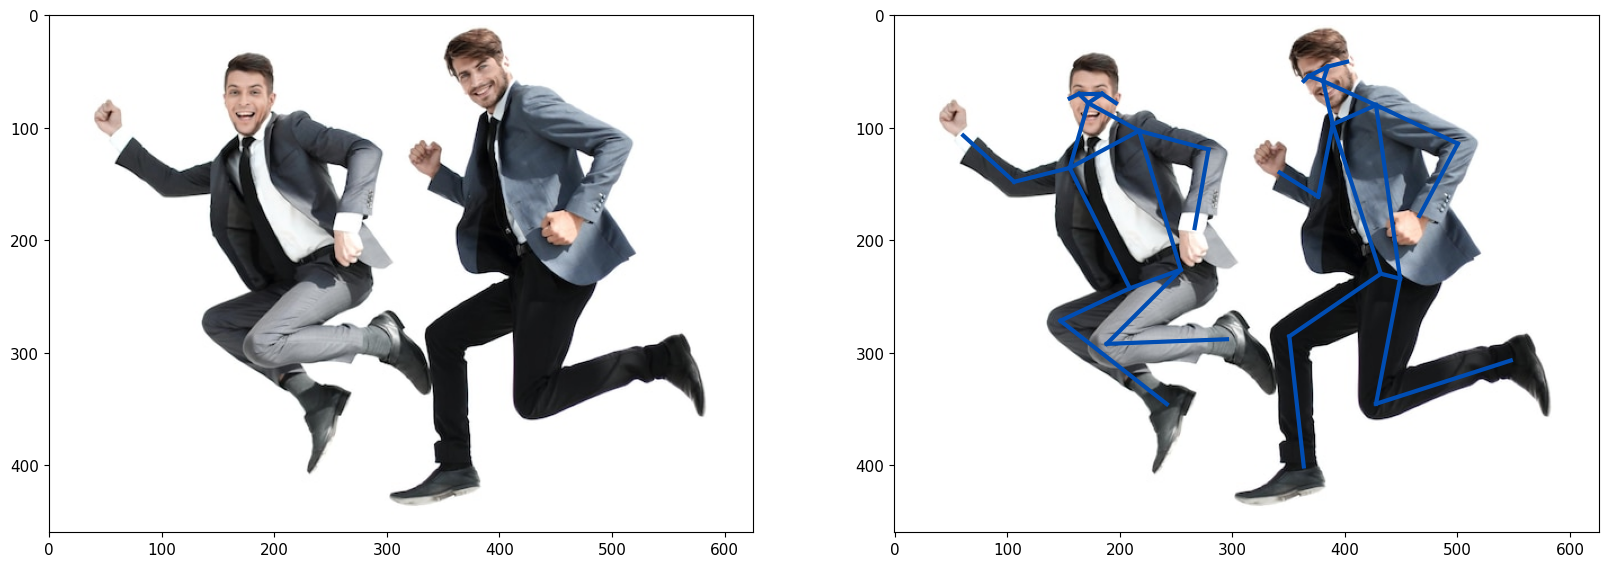

In [67]:
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]

    for bone in bones:
        xs = [output[:, bone[0], 1], output[:, bone[1], 1]]
        ys = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xs, ys, linewidth=3, c=(0, 0.3, 0.7))
    # ax.scatter(joints[:,:,1], joints[:,:,0], s=20, x='b')

fix, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(im)

axs[1].imshow(im)
plot_joints(axs[1], joints)

***

In [2]:
%cd yolov5/

c:\VSCodeProjects\PatternRecognition\Lab-9\yolov5


In [14]:
%cd yolov5/

c:\VSCodeProjects\PatternRecognition\Lab-9\yolov5


In [16]:
!python train.py --img 640 --batch 16 --epochs 10 --data ../PenDataset/data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=../PenDataset/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-304-g22361691 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b